In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import pandas as pd

In [2]:
parking_lot_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/parking_lot_batch_ids_new_noise.pickle", 'rb'))
roof_top_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/roof_top_batch_ids_new_noise.pickle", 'rb'))
rock_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/rock_batch_ids_new_noise.pickle", 'rb'))
grassland_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/grassland_batch_ids_new_noise.pickle", 'rb'))
shrub_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/shrub_batch_ids_new_noise.pickle", 'rb'))
tree_id_new_noise = pickle.load(open("/home/makiper/Bootstrap/tree_batch_ids_new_noise.pickle", 'rb'))

In [3]:
parking_lot_id_new_noise_m = np.mean(parking_lot_id_new_noise, axis=0)
roof_top_id_new_noise_m = np.mean(roof_top_id_new_noise, axis=0)
rock_id_new_noise_m = np.mean(rock_id_new_noise, axis=0)
grassland_id_new_noise_m = np.mean(grassland_id_new_noise, axis=0)
shrub_id_new_noise_m = np.mean(shrub_id_new_noise, axis=0)
tree_id_new_noise_m = np.mean(tree_id_new_noise, axis=0)

In [4]:
parking_lot_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/parking_lot_batch_ids.pickle", 'rb'))
roof_top_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/roof_top_batch_ids.pickle", 'rb'))
rock_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/rock_batch_ids.pickle", 'rb'))
grassland_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/grassland_batch_ids.pickle", 'rb'))
shrub_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/shrub_batch_ids.pickle", 'rb'))
tree_id_old_noise = pickle.load(open("/home/makiper/Bootstrap/tree_batch_ids.pickle", 'rb'))

In [5]:
parking_lot_id_old_noise_m = np.mean(parking_lot_id_old_noise, axis=0)
roof_top_id_old_noise_m = np.mean(roof_top_id_old_noise, axis=0)
rock_id_old_noise_m = np.mean(rock_id_old_noise, axis=0)
grassland_id_old_noise_m = np.mean(grassland_id_old_noise, axis=0)
shrub_id_old_noise_m = np.mean(shrub_id_old_noise, axis=0)
tree_id_old_noise_m = np.mean(tree_id_old_noise, axis=0)

In [6]:
# fit a polynomial to the data

In [7]:
d = 2

parking_lot_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=parking_lot_id_old_noise_m, deg=d))
roof_top_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=roof_top_id_old_noise_m, deg=d))
rock_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=rock_id_old_noise_m, deg=d))
grassland_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=grassland_id_old_noise_m, deg=d))
shrub_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=shrub_id_old_noise_m, deg=d))
tree_old_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=tree_id_old_noise_m, deg=d))

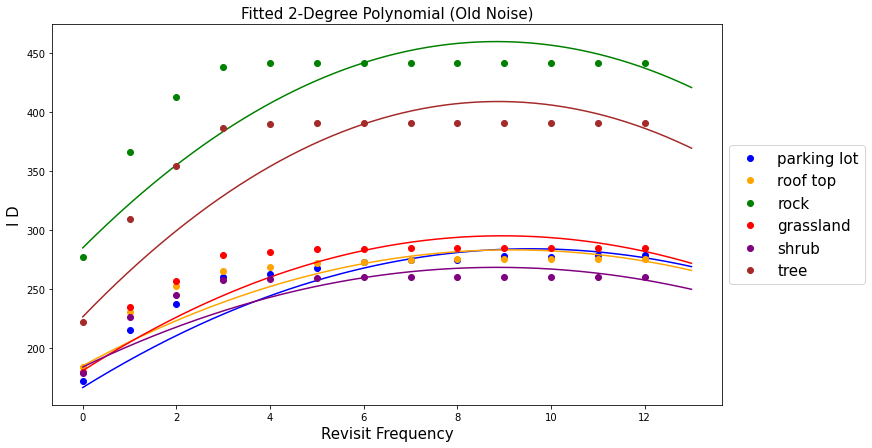

In [8]:
t = np.linspace(0, 13, 300)

fig = plt.figure(figsize=(12,7))
plt.plot([i for i in range(13)], parking_lot_id_old_noise_m, "o", color="blue", label='parking lot');
plt.plot(t, parking_lot_old_poly_3(t), "-", color="blue");
plt.plot([i for i in range(13)], roof_top_id_old_noise_m, "o", color="orange", label='roof top')
plt.plot(t, roof_top_old_poly_3(t), "-", color="orange");
plt.plot([i for i in range(13)], rock_id_old_noise_m, "o", color='green', label='rock')
plt.plot(t, rock_old_poly_3(t), "-", color='green');
plt.plot([i for i in range(13)], grassland_id_old_noise_m, "o", color='red', label='grassland')
plt.plot(t, grassland_old_poly_3(t), "-", color='red');
plt.plot([i for i in range(13)], shrub_id_old_noise_m, "o", color='purple', label='shrub')
plt.plot(t, shrub_old_poly_3(t), "-", color='purple');
plt.plot([i for i in range(13)], tree_id_old_noise_m, "o", color='brown', label='tree')
plt.plot(t, tree_old_poly_3(t), "-", color='brown');

plt.title(f"Fitted {d}-Degree Polynomial (Old Noise)", fontsize=15)
plt.xlabel("Revisit Frequency", fontsize=15);
plt.ylabel("I D", fontsize=15);

plt.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5));

In [9]:
rmse = []
rse = []
polys= [parking_lot_old_poly_3, roof_top_old_poly_3, rock_old_poly_3, grassland_old_poly_3, shrub_old_poly_3, tree_old_poly_3]
means = [parking_lot_id_old_noise_m, roof_top_id_old_noise_m, rock_id_old_noise_m, grassland_id_old_noise_m, shrub_id_old_noise_m, tree_id_old_noise_m]
for j, poly in enumerate(polys):
    this_rse = [((means[j][i] - poly(i))**2)**0.5 for i in range(13)]
    rse.append(this_rse)
    this_rmse = (sum([((means[j][i] - poly(i))**2) for i in range(13)])/13)**0.5
    rmse.append(this_rmse)
    
rse = np.mean(rse, axis=0)

Avg. RMSE: 19.683066879712594



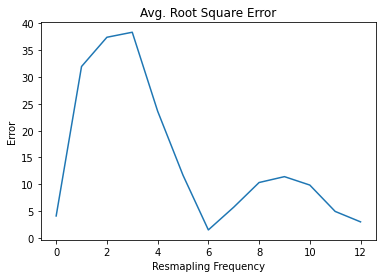

In [10]:
print(f"Avg. RMSE: {np.mean(rmse)}\n")
plt.plot(rse);
plt.title("Avg. Root Square Error");
plt.xlabel("Resmapling Frequency");
plt.ylabel("Error");

In [11]:
d=2

parking_lot_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=parking_lot_id_new_noise_m, deg=d))
roof_top_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=roof_top_id_new_noise_m, deg=d))
rock_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=rock_id_new_noise_m, deg=d))
grassland_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=grassland_id_new_noise_m, deg=d))
shrub_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=shrub_id_new_noise_m, deg=d))
tree_new_poly_3 = np.poly1d(np.polyfit(x=[i+1 for i in range(13)], y=tree_id_new_noise_m, deg=d))

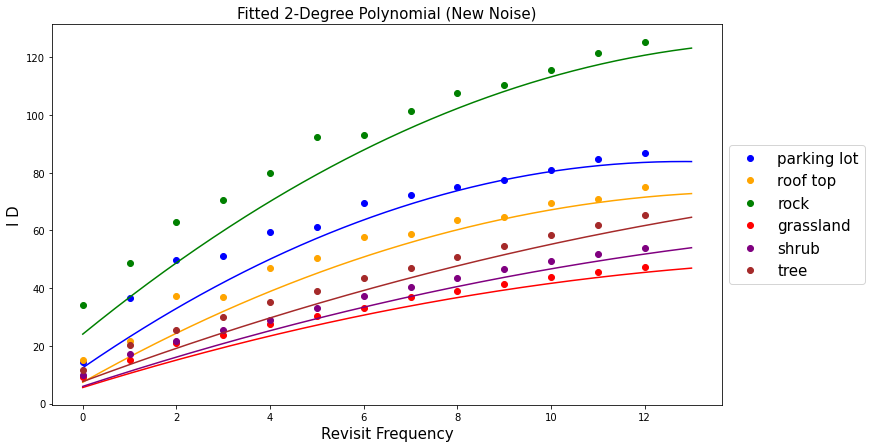

In [12]:
t = np.linspace(0, 13, 300)

fig = plt.figure(figsize=(12,7))
plt.plot([i for i in range(13)], parking_lot_id_new_noise_m, "o", color="blue", label='parking lot');
plt.plot(t, parking_lot_new_poly_3(t), "-", color="blue");
plt.plot([i for i in range(13)], roof_top_id_new_noise_m, "o", color="orange", label='roof top')
plt.plot(t, roof_top_new_poly_3(t), "-", color="orange");
plt.plot([i for i in range(13)], rock_id_new_noise_m, "o", color='green', label='rock')
plt.plot(t, rock_new_poly_3(t), "-", color='green');
plt.plot([i for i in range(13)], grassland_id_new_noise_m, "o", color='red', label='grassland')
plt.plot(t, grassland_new_poly_3(t), "-", color='red');
plt.plot([i for i in range(13)], shrub_id_new_noise_m, "o", color='purple', label='shrub')
plt.plot(t, shrub_new_poly_3(t), "-", color='purple');
plt.plot([i for i in range(13)], tree_id_new_noise_m, "o", color='brown', label='tree')
plt.plot(t, tree_new_poly_3(t), "-", color='brown');

plt.title(f"Fitted {d}-Degree Polynomial (New Noise)", fontsize=15)
plt.xlabel("Revisit Frequency", fontsize=15);
plt.ylabel("I D", fontsize=15);

plt.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5));

In [13]:
rmse = []
rse = []
polys= [parking_lot_new_poly_3, roof_top_new_poly_3, rock_new_poly_3, grassland_new_poly_3, shrub_new_poly_3, tree_new_poly_3]
means = [parking_lot_id_new_noise_m, roof_top_id_new_noise_m, rock_id_new_noise_m, grassland_id_new_noise_m, shrub_id_new_noise_m, tree_id_new_noise_m]
for j, poly in enumerate(polys):
    this_rse = [((means[j][i] - poly(i))**2)**0.5 for i in range(13)]
    rse.append(this_rse)
    this_rmse = (sum([((means[j][i] - poly(i))**2) for i in range(13)])/13)**0.5
    rmse.append(this_rmse)
    
rse = np.mean(rse, axis=0)

Avg. RMSE: 5.636218246867782



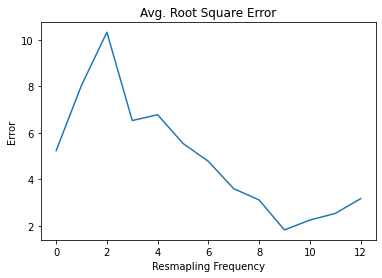

In [14]:
print(f"Avg. RMSE: {np.mean(rmse)}\n")
plt.plot(rse);
plt.title("Avg. Root Square Error");
plt.xlabel("Resmapling Frequency");
plt.ylabel("Error");